In [2]:
# enable environment before execute notebook
# workon my-virtualenv-name  # activate your virtualenv, if you haven't already
# pip install ipykernel
# python -m ipykernel install --user --name=transformers-course
# select the proper kernel on the notebook
!pip install librosa
!pip install audio_metadata
!pip install matplotlib


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from transformers import WhisperTokenizer
from datasets import load_dataset, DatasetDict
import librosa
import audio_metadata
import librosa.display
from matplotlib import pyplot as plt
from scipy.io import wavfile
import IPython

In [4]:
common_voice = DatasetDict()
language = 'es'
dataset_name = "mozilla-foundation/common_voice_11_0"

In [5]:
common_voice["train"] = load_dataset(dataset_name, language, split="train+validation", use_auth_token=True)
common_voice["test"] = load_dataset(dataset_name, language, split="test", use_auth_token=True)

Found cached dataset common_voice_11_0 (/home/jgonzalez/.cache/huggingface/datasets/mozilla-foundation___common_voice_11_0/es/11.0.0/2c65b95d99ca879b1b1074ea197b65e0497848fd697fdb0582e0f6b75b6f4da0)
Found cached dataset common_voice_11_0 (/home/jgonzalez/.cache/huggingface/datasets/mozilla-foundation___common_voice_11_0/es/11.0.0/2c65b95d99ca879b1b1074ea197b65e0497848fd697fdb0582e0f6b75b6f4da0)


In [6]:
print(common_voice)

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 245987
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 15520
    })
})


In [9]:
tokenizer = WhisperTokenizer.from_pretrained(
        "openai/whisper-small", 
        language="Spanish", 
        task="transcribe"
    )

In [10]:
input_str = common_voice["train"][0]["sentence"]
labels = tokenizer(input_str).input_ids
decoded_with_special = tokenizer.decode(labels, skip_special_tokens=False)
decoded_str = tokenizer.decode(labels, skip_special_tokens=True)

In [11]:
print(f"Input:                 {input_str}")
print(f"Decoded w/ special:    {decoded_with_special}")
print(f"Decoded w/out special: {decoded_str}")
print(f"Are equal:             {input_str == decoded_str}")

Input:                 ¿ Qué tal a tres de cinco ?
Decoded w/ special:    <|startoftranscript|><|es|><|transcribe|><|notimestamps|>¿ Qué tal a tres de cinco ?<|endoftext|>
Decoded w/out special: ¿ Qué tal a tres de cinco ?
Are equal:             True


In [12]:
from pprint import pprint
pprint(common_voice["train"][0])

{'accent': '',
 'age': '',
 'audio': {'array': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -3.2585538e-06, -3.5239013e-06, -3.0528611e-06], dtype=float32),
           'path': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/common_voice_es_18338585.mp3',
           'sampling_rate': 48000},
 'client_id': '34719bb7c7344da7733b85c9d7215d24326093f1a2cd3a445bdc6dfe9ec4a8c9fe9729a73f6c29764545276bff81ffa65d3944f6da7a3ee3c06d0eb124fac797',
 'down_votes': 1,
 'gender': '',
 'locale': 'es',
 'path': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/common_voice_es_18338585.mp3',
 'segment': '',
 'sentence': '¿ Qué tal a tres de cinco ?',
 'up_votes': 2}


In [13]:
filename = '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/' + 'es_train_0/' + 'common_voice_es_18338585.mp3' 
print(filename)
audio_metadata.load(filename)

/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/es_train_0/common_voice_es_18338585.mp3


<MP3({
    'filepath': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/es_train_0/common_voice_es_18338585.mp3',
    'filesize': '35.48 KiB',
    'pictures': [],
    'streaminfo': <MP3StreamInfo({
        'bitrate': '64 Kbps',
        'bitrate_mode': <MP3BitrateMode.CBR>,
        'channel_mode': <MP3ChannelMode.MONO>,
        'channels': 1,
        'duration': '00:05',
        'layer': 3,
        'protected': False,
        'sample_rate': '48.0 KHz',
        'version': 1,
    })>,
    'tags': <ID3v2Frames({'encodersettings': ['Lavf56.40.101']})>,
})>

In [14]:
IPython.display.Audio(data=filename, rate=48000)

In [23]:
y = common_voice["train"][0]['audio']['array']
print(y)
import matplotlib.pyplot

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2585538e-06
 -3.5239013e-06 -3.0528611e-06]


In [24]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    try:
        plt.figure(figsize=(8, 2))
        plt.plot(x, color='blue')
        plt.xlim([0, x.shape[0]])
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)
    IPython.display.Audio(data=x, rate=Fs)

MP3 file:  Fs = 48000, x.shape = (217728,), x.dtype = float32


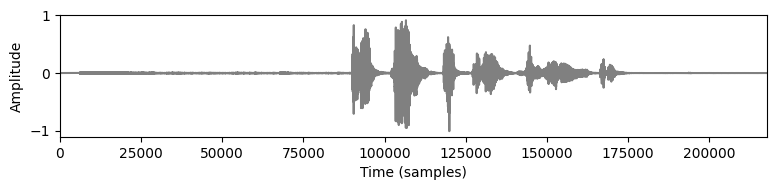

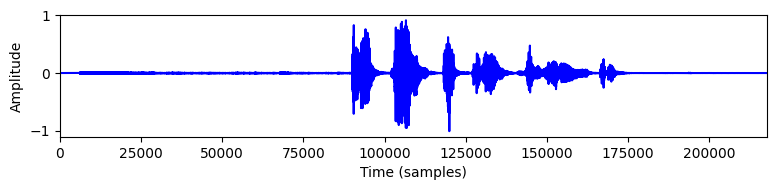

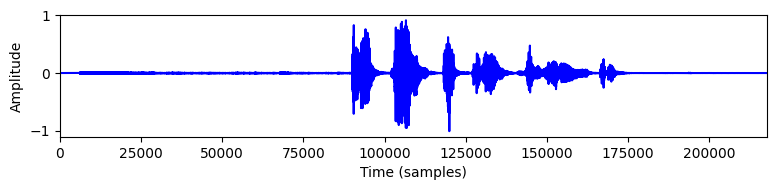

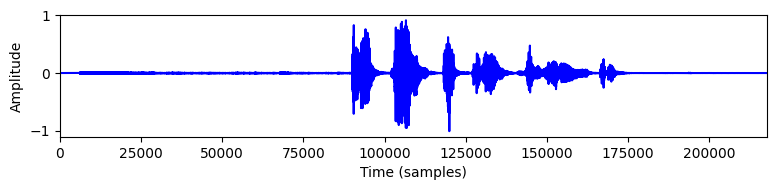

module 'matplotlib' has no attribute 'pyplot'


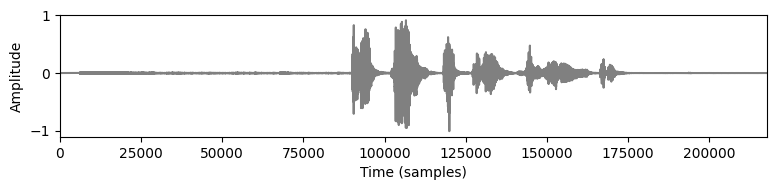

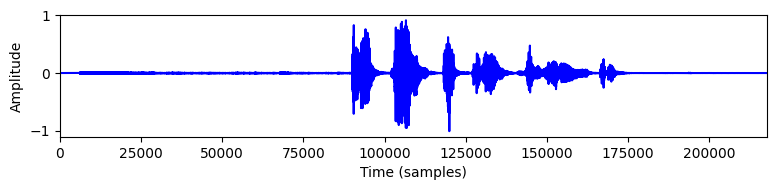

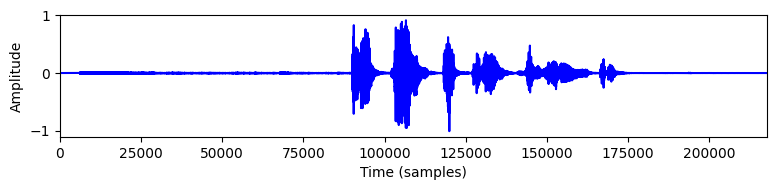

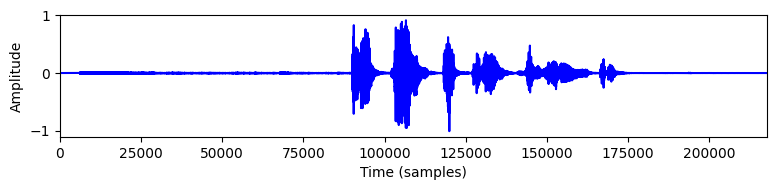

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [25]:
print_plot_play(x=y, Fs=48000, text='MP3 file: ')